In [1]:
import os
import sys
# Add the scripts folder to the Python path
sys.path.append(os.path.abspath("../scripts"))

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from statistical_testing import (
    analyze_risk_differences,
    compare_groups,
    calculate_risk_ratio
)
from visualizations import (
    plot_boxplot,
    plot_categorical_distribution,
    plot_scatter
)

In [3]:
# Load the data
data = pd.read_csv('data/cleaned_data.csv')

In [4]:
# Risk Differences Across Provinces
# Calculate risk ratio for each province
province_risks = analyze_risk_differences(data, 'Province')
print("\nProvince Risk Analysis:")
print(province_risks)

# Conduct statistical test
# Compare two largest provinces
top_provinces = province_risks.nlargest(2, 'risk_ratio')['Province'].values
t_stat, p_value, summary = compare_groups(
    data,
    'Province',
    'TotalClaims',
    top_provinces[0],
    top_provinces[1]
)

print(f"\nProvince Risk Test (comparing {top_provinces[0]} vs {top_provinces[1]}):")
print(f"P-value: {p_value}")
print(f"Null Hypothesis {'rejected' if p_value < 0.05 else 'failed to reject'}")


Province Risk Analysis:
        Province   TotalClaims             TotalPremium            risk_ratio  \
                           sum       mean           sum       mean              
0   Eastern Cape  1.356427e+06  44.713432  2.140104e+06  70.546672   0.633813   
1     Free State  3.549223e+05  43.822975  5.213632e+05  64.373780   0.680758   
2        Gauteng  2.939415e+07  74.630009  2.405377e+07  61.071115   1.222018   
3  KwaZulu-Natal  1.430138e+07  84.234293  1.320908e+07  77.800695   1.082693   
4        Limpopo  1.016477e+06  40.927553  1.537324e+06  61.899038   0.661199   
5     Mpumalanga  2.044675e+06  38.785147  2.836292e+06  53.801205   0.720897   
6     North West  5.920250e+06  41.317426  7.490508e+06  52.276258   0.790367   
7  Northern Cape  8.949051e+04  14.026726  3.165581e+05  49.617253   0.282699   
8   Western Cape  1.038977e+07  60.831482  9.806559e+06  57.416793   1.059472   

  profit_margin  
                 
0      0.366187  
1      0.319242  
2     -0.22

In [5]:
# Risk Differences Between Zip Codes
zipcode_risks = analyze_risk_differences(data, 'PostalCode')
print("\nZip Code Risk Analysis:")
print(zipcode_risks.head())

# Compare top two zip codes by volume
top_zipcodes = zipcode_risks.nlargest(2, ('TotalPremium', 'sum'))['PostalCode'].values
t_stat, p_value, summary = compare_groups(
    data,
    'PostalCode',
    'TotalClaims',
    top_zipcodes[0],
    top_zipcodes[1]
)

print(f"\nZip Code Risk Test (comparing {top_zipcodes[0]} vs {top_zipcodes[1]}):")
print(f"P-value: {p_value}")
print(f"Null Hypothesis {'rejected' if p_value < 0.05 else 'failed to reject'}")


Zip Code Risk Analysis:
  PostalCode    TotalClaims               TotalPremium             risk_ratio  \
                        sum        mean            sum        mean              
0          1  307583.342105   57.589092  273035.326595   51.120638   1.126533   
1          2   61885.298246   41.589582   60861.729133   40.901700   1.016818   
2          4       0.000000    0.000000    8773.975714  113.947737   0.000000   
3          5   82951.526316  207.378816   24661.450526   61.653626   3.363611   
4          6    8628.596491   19.610447   22260.230088   50.591432   0.387624   

  profit_margin  
                 
0     -0.126533  
1     -0.016818  
2      1.000000  
3     -2.363611  
4      0.612376  

Zip Code Risk Test (comparing 2000 vs 122):
P-value: 0.5457671850912713
Null Hypothesis failed to reject


In [6]:
# 3. Margin Differences Between Zip Codes
# Calculate profit margin
data['ProfitMargin'] = (data['TotalPremium'] - data['TotalClaims']) / data['TotalPremium']

zipcode_margins = data.groupby('PostalCode')['ProfitMargin'].agg(['mean', 'std', 'count']).reset_index()
print("\nZip Code Margin Analysis:")
print(zipcode_margins.head())

# Compare top two zip codes by volume
t_stat, p_value, summary = compare_groups(
    data,
    'PostalCode',
    'ProfitMargin',
    top_zipcodes[0],
    top_zipcodes[1]
)

print(f"\nZip Code Margin Test (comparing {top_zipcodes[0]} vs {top_zipcodes[1]}):")
print(f"P-value: {p_value}")
print(f"Null Hypothesis {'rejected' if p_value < 0.05 else 'failed to reject'}")


Zip Code Margin Analysis:
   PostalCode      mean        std  count
0           1      -inf        NaN   2850
1           2  0.147242  12.913294    653
2           4  1.000000   0.000000     77
3           5  0.301099   7.334458    360
4           6  0.877073   1.287132    220

Zip Code Margin Test (comparing 2000 vs 122):
P-value: nan
Null Hypothesis failed to reject


d:\Kifya_training\Week 3\Week 3\AlphaCare-Insurance-Analysis\venv\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
d:\Kifya_training\Week 3\Week 3\AlphaCare-Insurance-Analysis\venv\Lib\site-packages\scipy\stats\_stats_py.py:1079: RuntimeWarning: invalid value encountered in subtract
  a_zero_mean = a - mean
d:\Kifya_training\Week 3\Week 3\AlphaCare-Insurance-Analysis\venv\Lib\site-packages\scipy\stats\_stats_py.py:6527: RuntimeWarning: invalid value encountered in scalar subtract
  d = mean1 - mean2
d:\Kifya_training\Week 3\Week 3\AlphaCare-Insurance-Analysis\venv\Lib\site-packages\scipy\stats\_stats_py.py:7025: RuntimeWarning: invalid value encountered in scalar subtract
  estimate = m1-m2


In [7]:
#Risk Differences Between Gender
gender_risks = analyze_risk_differences(data, 'Gender')
print("\nGender Risk Analysis:")
print(gender_risks)

# Compare Male vs Female
t_stat, p_value, summary = compare_groups(
    data,
    'Gender',
    'TotalClaims',
    'Male',
    'Female'
)

print(f"\nGender Risk Test:")
print(f"P-value: {p_value}")
print(f"Null Hypothesis {'rejected' if p_value < 0.05 else 'failed to reject'}")



Gender Risk Analysis:
          Gender   TotalClaims             TotalPremium            risk_ratio  \
                           sum       mean           sum       mean              
0         Female  2.502461e+05  37.046055  3.044806e+05  45.074841   0.821879   
1           Male  1.396704e+06  32.620312  1.580143e+06  36.904566   0.883910   
2  Not specified  6.322060e+07  66.511170  6.002694e+07  63.151286   1.053204   

  profit_margin  
                 
0      0.178121  
1      0.116090  
2     -0.053204  

Gender Risk Test:
P-value: 0.7669656471629474
Null Hypothesis failed to reject


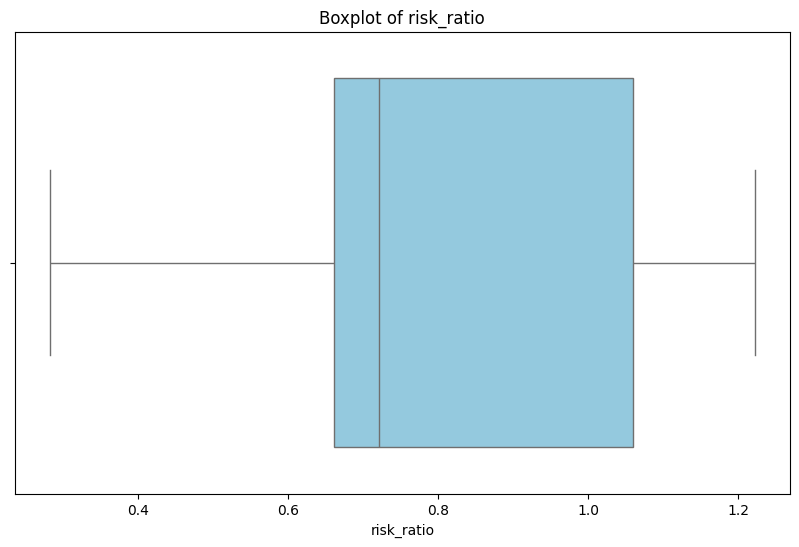

In [9]:
# Calculate risk ratios for provinces
province_risks = analyze_risk_differences(data, 'Province')

# 1. View Risk Distribution by Province
plot_boxplot(
    data=province_risks,
    column_name='risk_ratio',
    save_path=None  # Set to None to display in notebook
)

d:\Kifya_training\Week 3\Week 3\AlphaCare-Insurance-Analysis\scripts\visualizations.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=column_name, palette="Set2")


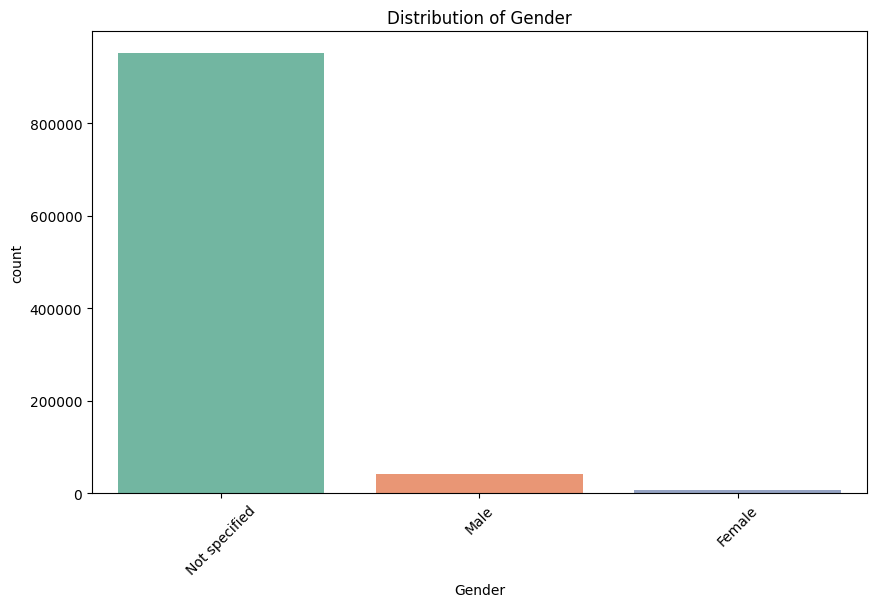

In [11]:
# 2. Visualize Gender Distribution
plot_categorical_distribution(
    data=data,  # Your main DataFrame
    column_name='Gender',
    save_path=None
)



In [ ]:
# 3. Visualize Premium vs Claims by Gender
plot_scatter(
    data=data,  # Your main DataFrame
    x_column='TotalPremium',
    y_column='TotalClaims',
    title='Premium vs Claims by Gender',
    x_label='Total Premium',
    y_label='Total Claims',
    geographic_column='Gender',  # This will color the points by gender
    save_path='plots/gender_premium_claims.png'
)



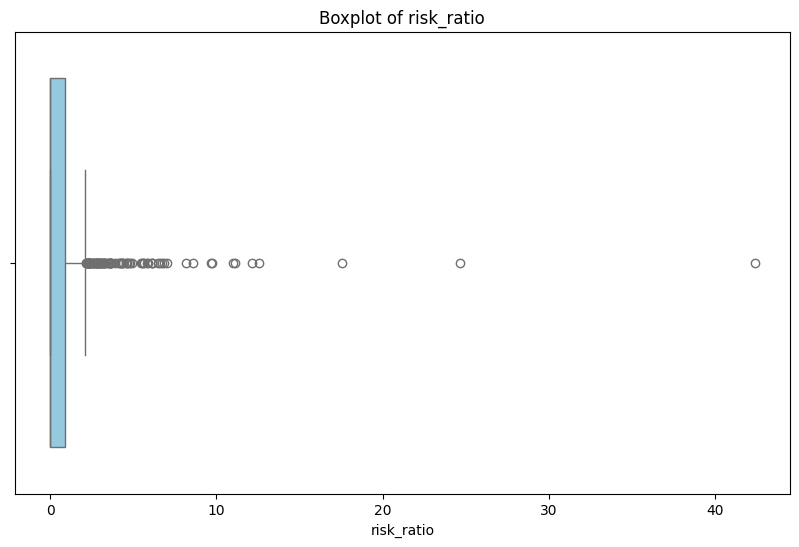

In [12]:
# 4. Additional visualization for risk analysis
# Visualize risk distribution by postal code
plot_boxplot(
    data=zipcode_risks,
    column_name='risk_ratio',
    save_path=None  
)



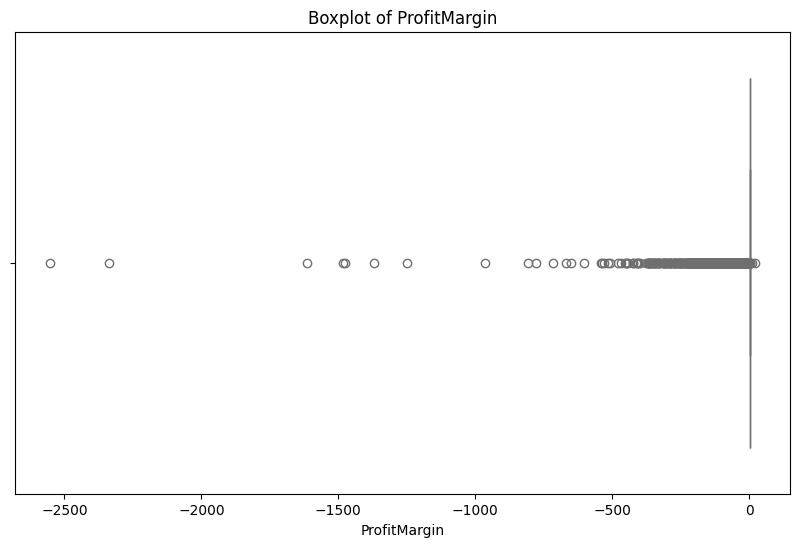

In [13]:
# 5. Visualize profit margin distribution
plot_boxplot(
    data=data,
    column_name='ProfitMargin',
    save_path=None
)